In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [510]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/respiratoryrate vs r-r values/totaldata.csv")

In [511]:
df.head(1000)

,respiratoryrate,rrvalues
0,15.8475,0.793
1,15.8475,0.796
2,15.8475,0.801
3,15.8475,0.850
4,15.8475,0.857
...,...,...
995,15.8920,0.803
996,15.8920,0.773
997,15.5987,0.776
998,15.3130,0.780


In [512]:
df.describe()

,respiratoryrate,rrvalues
count,5111.000000,5111.000000
mean,13.473745,0.755906
std,2.234247,0.062946
min,5.883100,0.583000
25%,12.443400,0.712000
50%,13.655500,0.759000
75%,14.653550,0.798000
max,62.344300,1.409000


In [513]:
df.shape


(5111, 2)

In [514]:
cdf = df[['respiratoryrate','rrvalues']]
cdf.head(5)

,respiratoryrate,rrvalues
0,15.8475,0.793
1,15.8475,0.796
2,15.8475,0.801
3,15.8475,0.850
4,15.8475,0.857


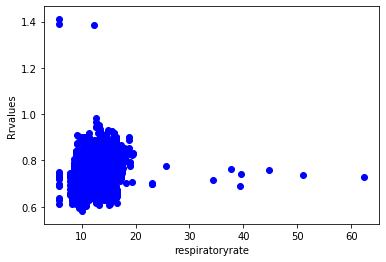

In [515]:
#graph of SNO vs r-r values

plt.scatter(cdf.respiratoryrate, cdf.rrvalues,color='blue')
plt.xlabel('respiratoryrate')
plt.ylabel('Rrvalues')
plt.show()

In [516]:
#splitting our data in 80-20 ratio for regression

In [517]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

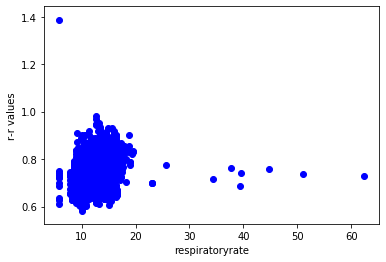

In [518]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
plt.xlabel("respiratoryrate")
plt.ylabel("r-r values")
plt.show()

In [519]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['respiratoryrate']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.0037812]]
Intercept:  [0.70512877]


Text(0, 0.5, 'r-r values')

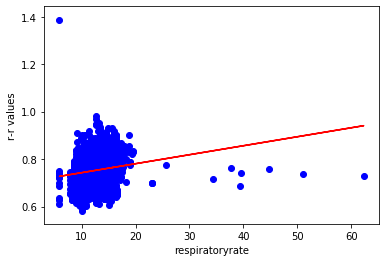

In [520]:
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("respiratoryrate")
plt.ylabel("r-r values")

In [521]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['respiratoryrate']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -97.90


In [522]:
#using polynomial regression

In [523]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['respiratoryrate']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['respiratoryrate']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.        ,  15.8475    , 251.14325625],
       [  1.        ,  15.8475    , 251.14325625],
       [  1.        ,  15.8475    , 251.14325625],
       ...,
       [  1.        ,  15.14      , 229.2196    ],
       [  1.        ,  15.14      , 229.2196    ],
       [  1.        ,  15.14      , 229.2196    ]])

In [524]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.          0.00992791 -0.00016199]]
Intercept:  [0.65257462]


Text(0, 0.5, 'r-rvalues')

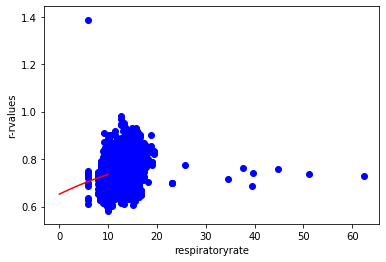

In [526]:
#plotting the polynomial regression
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("respiratoryrate")
plt.ylabel("r-rvalues")

In [527]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -42.36
